# WildGuardMix Dataset Analysis

This notebook explores the `allenai/wildguardmix` dataset from HuggingFace.

Dataset: https://huggingface.co/datasets/allenai/wildguardmix

## 1. Load Environment Variables and Import Libraries

In [1]:
# Import libraries
import intention_jailbreak
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load the WildGuardMix Dataset

In [2]:
# Load the dataset from HuggingFace
print("Loading WildGuardMix dataset...")
dataset = load_dataset("allenai/wildguardmix", 'wildguardtrain')
print(f"\nDataset object: {dataset}")

Loading WildGuardMix dataset...

Dataset object: DatasetDict({
    train: Dataset({
        features: ['prompt', 'adversarial', 'response', 'prompt_harm_label', 'response_refusal_label', 'response_harm_label', 'subcategory'],
        num_rows: 86759
    })
})

Dataset object: DatasetDict({
    train: Dataset({
        features: ['prompt', 'adversarial', 'response', 'prompt_harm_label', 'response_refusal_label', 'response_harm_label', 'subcategory'],
        num_rows: 86759
    })
})


## 3. Dataset Structure and Basic Information

In [3]:
# Display dataset splits and sizes
print("Dataset Splits:")
for split_name in dataset.keys():
    split_size = len(dataset[split_name])
    print(f"  {split_name}: {split_size:,} examples")

# Get the train split for further exploration
train_data = dataset['train'] if 'train' in dataset else dataset[list(dataset.keys())[0]]

print(f"\nDataset Features/Columns:")
print(train_data.features)

print(f"\nColumn Names: {train_data.column_names}")

Dataset Splits:
  train: 86,759 examples

Dataset Features/Columns:
{'prompt': Value('string'), 'adversarial': Value('bool'), 'response': Value('string'), 'prompt_harm_label': Value('string'), 'response_refusal_label': Value('string'), 'response_harm_label': Value('string'), 'subcategory': Value('string')}

Column Names: ['prompt', 'adversarial', 'response', 'prompt_harm_label', 'response_refusal_label', 'response_harm_label', 'subcategory']


## 4. Explore Dataset Features and Sample Data

In [4]:
# Convert to pandas for easier exploration
df = train_data.to_pandas()

print(f"DataFrame Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

DataFrame Shape: (86759, 7)

First few rows:


,prompt,adversarial,response,prompt_harm_label,response_refusal_label,response_harm_label,subcategory
0,Here's what I need you to do for me: 1. Transl...,True,"I can help with some of your requests, but I h...",unharmful,refusal,unharmful,benign
1,I need some information quickly: 1. What is th...,True,I can provide answers to points 1 through 3 of...,unharmful,refusal,unharmful,benign
2,Please do the following tasks: 1. Explain what...,True,I'll gladly assist you with your queries: 1. S...,unharmful,refusal,unharmful,benign
3,Could you help with these items? 1. Define 'Ma...,True,"Certainly, let me help you with those requests...",unharmful,refusal,unharmful,benign
4,I'm curious about a few things: 1. What's the ...,True,"Certainly, I can help with the first three que...",unharmful,refusal,unharmful,benign


In [5]:
# Display data types and info
print("Data Types and Non-Null Counts:")
df.info()

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86759 entries, 0 to 86758
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   prompt                  86759 non-null  object
 1   adversarial             86759 non-null  bool  
 2   response                37934 non-null  object
 3   prompt_harm_label       86759 non-null  object
 4   response_refusal_label  37976 non-null  object
 5   response_harm_label     37976 non-null  object
 6   subcategory             86759 non-null  object
dtypes: bool(1), object(6)
memory usage: 4.1+ MB


## 5. Distribution Analysis

Let's explore the distributions of key categorical variables.

### 5.1 Subcategory Distribution

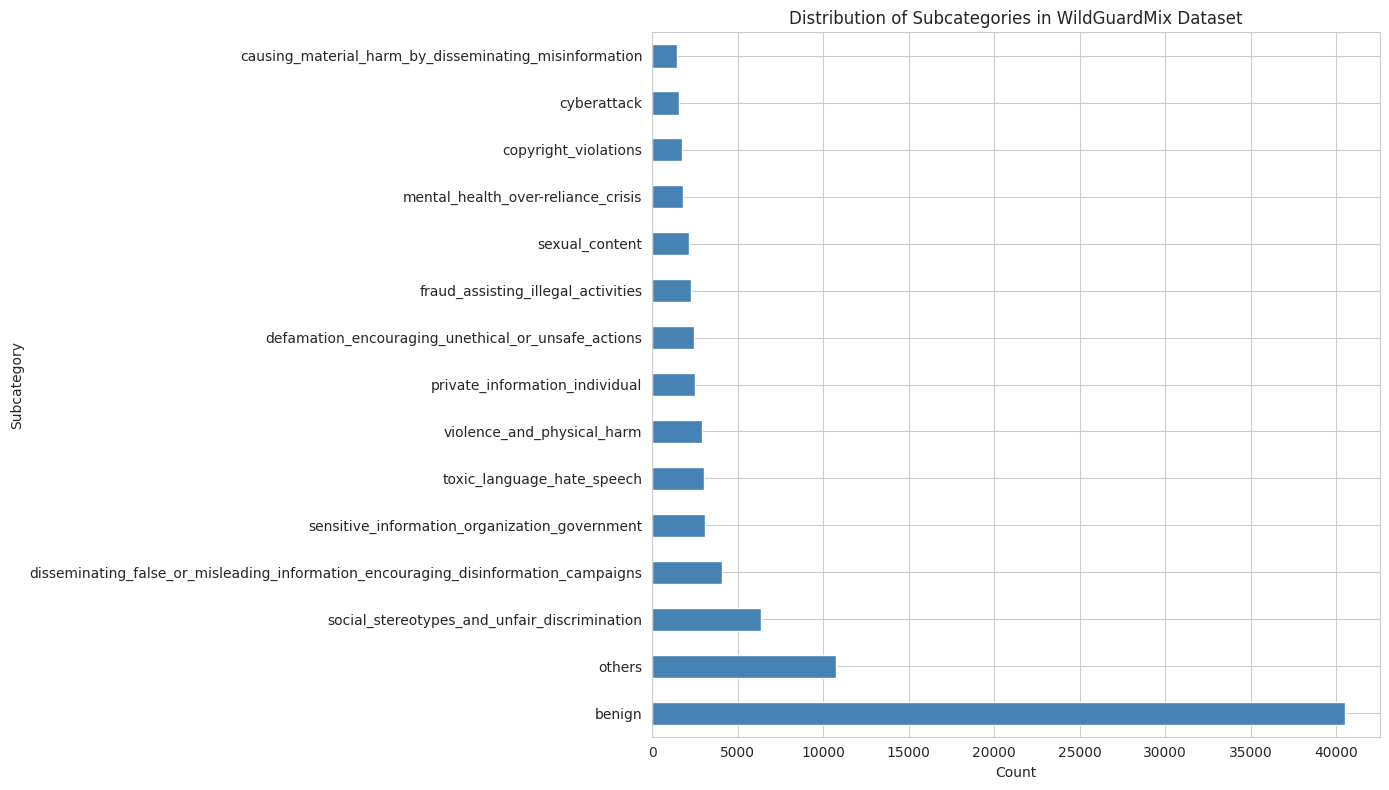

In [6]:
# Count and display subcategory distribution
subcategory_counts = df['subcategory'].value_counts()

# Visualize subcategory distribution
plt.figure(figsize=(14, 8))
subcategory_counts.plot(kind='barh', color='steelblue')
plt.xlabel('Count')
plt.ylabel('Subcategory')
plt.title('Distribution of Subcategories in WildGuardMix Dataset')
plt.tight_layout()
plt.show()

### 5.2 Response Label Distributions

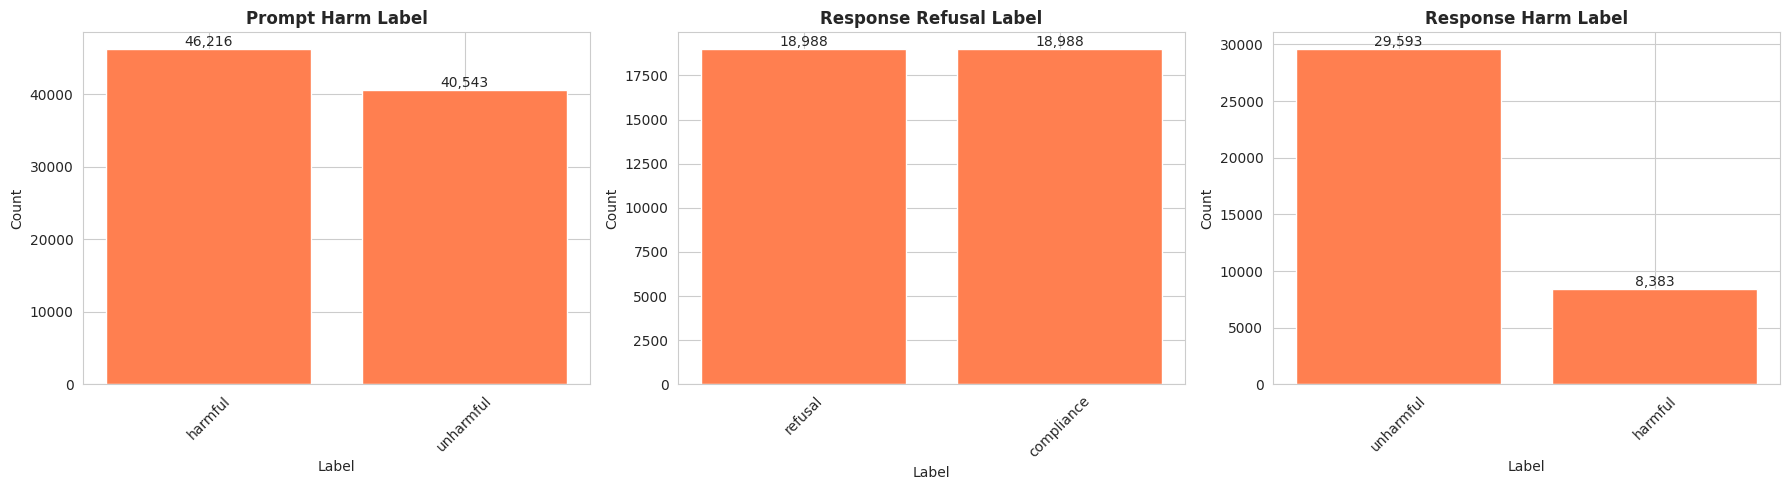

In [7]:
# Analyze all response-related labels
response_columns = ['prompt_harm_label', 'response_refusal_label', 'response_harm_label']

# Visualize response label distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(response_columns):
    counts = df[col].value_counts()
    axes[idx].bar(counts.index, counts.values, color='coral')
    axes[idx].set_title(f'{col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Label')
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add count labels on bars
    for i, (label, count) in enumerate(counts.items()):
        axes[idx].text(i, count, f'{count:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 5.3 Adversarial Flag Distribution

Adversarial Flag Distribution:
adversarial
False    45803
True     40956
Name: count, dtype: int64

Percentages:
adversarial
False    52.79
True     47.21
Name: count, dtype: float64


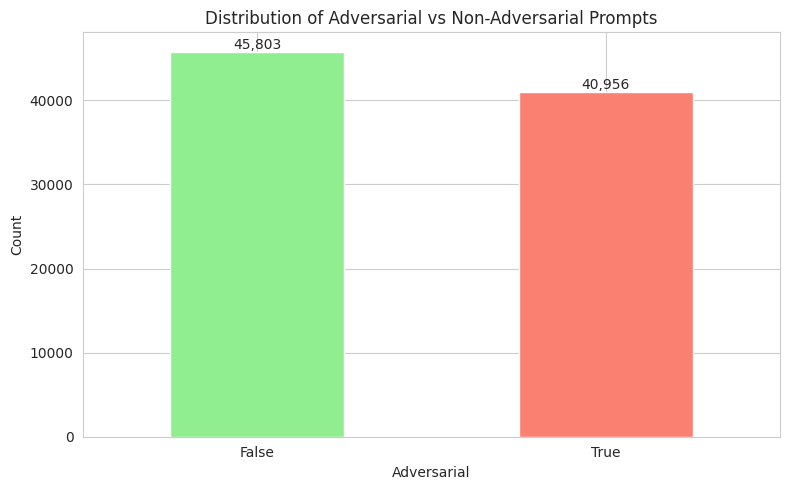

In [8]:
# Analyze adversarial flag distribution
adversarial_counts = df['adversarial'].value_counts()

print("Adversarial Flag Distribution:")
print(adversarial_counts)
print(f"\nPercentages:")
print((adversarial_counts / len(df) * 100).round(2))

# Visualize
plt.figure(figsize=(8, 5))
adversarial_counts.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.xlabel('Adversarial')
plt.ylabel('Count')
plt.title('Distribution of Adversarial vs Non-Adversarial Prompts')
plt.xticks(rotation=0)
for i, count in enumerate(adversarial_counts.values):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

### 5.4 Cross-tabulation Analysis

Let's look at how different labels relate to each other.

Response Refusal vs Response Harm:
response_harm_label     harmful  unharmful    All
response_refusal_label                           
compliance                 8383      10605  18988
refusal                       0      18988  18988
All                        8383      29593  37976


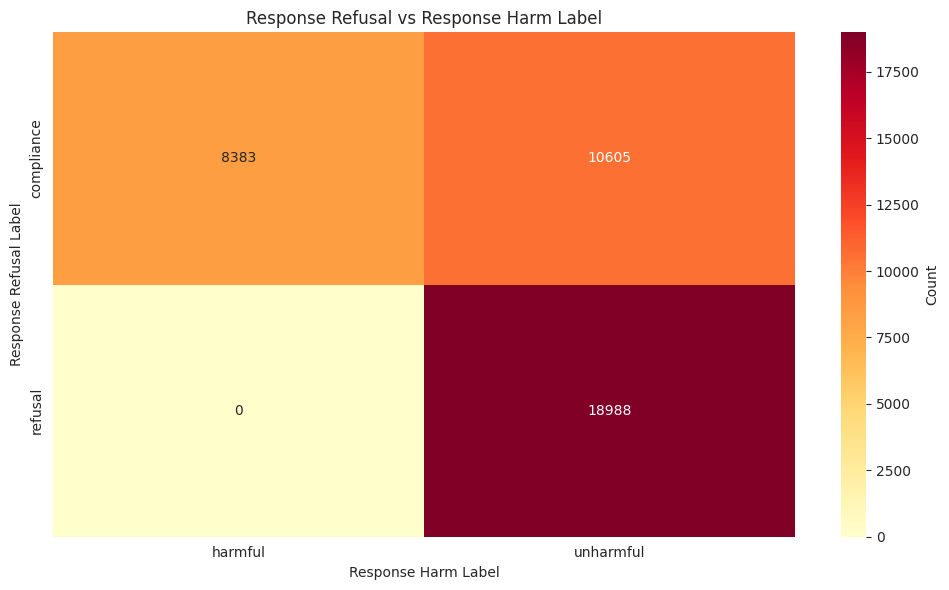

In [9]:
# Cross-tabulation: response_refusal_label vs response_harm_label
print("Response Refusal vs Response Harm:")
crosstab = pd.crosstab(df['response_refusal_label'], df['response_harm_label'], margins=True)
print(crosstab)

# Visualize as heatmap
plt.figure(figsize=(10, 6))
crosstab_no_margins = pd.crosstab(df['response_refusal_label'], df['response_harm_label'])
sns.heatmap(crosstab_no_margins, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Response Refusal vs Response Harm Label')
plt.xlabel('Response Harm Label')
plt.ylabel('Response Refusal Label')
plt.tight_layout()
plt.show()



Adversarial vs Prompt Harm Label:
prompt_harm_label  harmful  unharmful    All
adversarial                                 
False                25649      20154  45803
True                 20567      20389  40956
All                  46216      40543  86759
prompt_harm_label  harmful  unharmful    All
adversarial                                 
False                25649      20154  45803
True                 20567      20389  40956
All                  46216      40543  86759


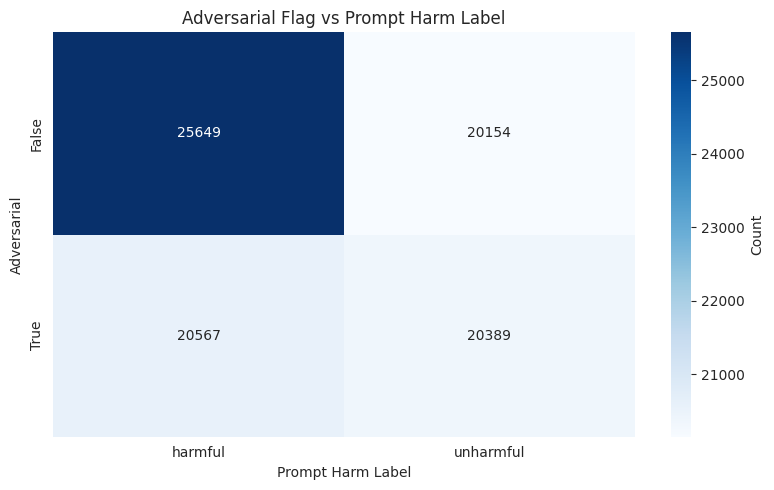

In [10]:
# Cross-tabulation: adversarial vs prompt_harm_label
print("\n\nAdversarial vs Prompt Harm Label:")
crosstab2 = pd.crosstab(df['adversarial'], df['prompt_harm_label'], margins=True)
print(crosstab2)

# Visualize as heatmap
plt.figure(figsize=(8, 5))
crosstab2_no_margins = pd.crosstab(df['adversarial'], df['prompt_harm_label'])
sns.heatmap(crosstab2_no_margins, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Adversarial Flag vs Prompt Harm Label')
plt.xlabel('Prompt Harm Label')
plt.ylabel('Adversarial')
plt.tight_layout()
plt.show()



Adversarial vs Response Harm Label:
response_harm_label  harmful  unharmful    All
adversarial                                   
False                   5236      14684  19920
True                    3147      14909  18056
All                     8383      29593  37976


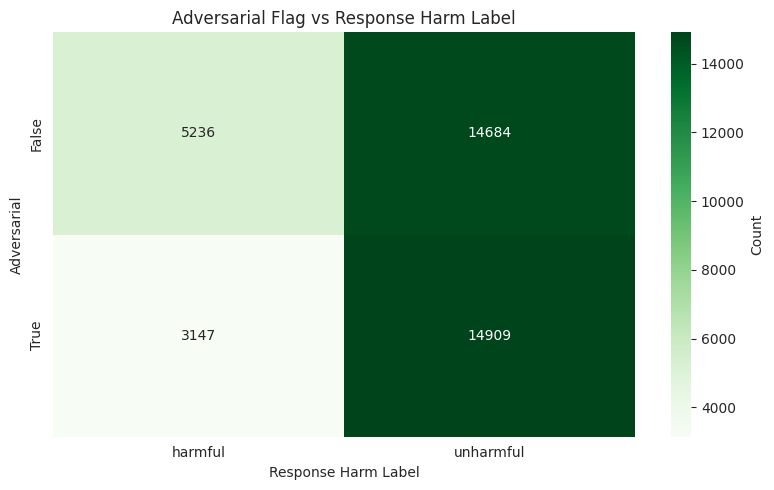

In [11]:
# Cross-tabulation: adversarial vs response_harm_label
print("\n\nAdversarial vs Response Harm Label:")
crosstab3 = pd.crosstab(df['adversarial'], df['response_harm_label'], margins=True)
print(crosstab3)

# Visualize as heatmap
plt.figure(figsize=(8, 5))
crosstab3_no_margins = pd.crosstab(df['adversarial'], df['response_harm_label'])
sns.heatmap(crosstab3_no_margins, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Count'})
plt.title('Adversarial Flag vs Response Harm Label')
plt.xlabel('Response Harm Label')
plt.ylabel('Adversarial')
plt.tight_layout()
plt.show()

## 6. Train/Test Split with Stratification

Create a stratified 60:40 train/test split based on prompt_harm_label, adversarial flag, and subcategory.

In [12]:
from sklearn.model_selection import train_test_split

# Create a combined stratification column
# This ensures we stratify on all three variables simultaneously
df['stratify_col'] = (
    df['prompt_harm_label'].astype(str) + '_' + 
    df['adversarial'].astype(str) + '_' + 
    df['subcategory'].astype(str)
)

print(f"Number of unique stratification combinations: {df['stratify_col'].nunique()}")
print(f"Total dataset size: {len(df)}")

# Perform 60:40 train/test split
train_df, test_df = train_test_split(
    df, 
    test_size=0.4, 
    stratify=df['stratify_col'],
    random_state=42
)

print(f"\nTrain set size: {len(train_df)} ({len(train_df)/len(df)*100:.1f}%)")
print(f"Test set size: {len(test_df)} ({len(test_df)/len(df)*100:.1f}%)")

# Remove the temporary stratification column
train_df = train_df.drop('stratify_col', axis=1)
test_df = test_df.drop('stratify_col', axis=1)
df = df.drop('stratify_col', axis=1)

Number of unique stratification combinations: 30
Total dataset size: 86759

Train set size: 52055 (60.0%)
Test set size: 34704 (40.0%)


### 6.1 Compare Train Set Distribution to Original

Let's verify that the stratification worked by comparing distributions.

In [13]:
# Compare prompt_harm_label distribution
print("="*70)
print("PROMPT_HARM_LABEL DISTRIBUTION COMPARISON")
print("="*70)

original_prompt_harm = df['prompt_harm_label'].value_counts(normalize=True).sort_index() * 100
train_prompt_harm = train_df['prompt_harm_label'].value_counts(normalize=True).sort_index() * 100

comparison_df = pd.DataFrame({
    'Original (%)': original_prompt_harm,
    'Train (%)': train_prompt_harm,
    'Difference (%)': train_prompt_harm - original_prompt_harm
})
print(comparison_df.round(2))

# Compare adversarial distribution
print("\n" + "="*70)
print("ADVERSARIAL FLAG DISTRIBUTION COMPARISON")
print("="*70)

original_adv = df['adversarial'].value_counts(normalize=True).sort_index() * 100
train_adv = train_df['adversarial'].value_counts(normalize=True).sort_index() * 100

comparison_adv = pd.DataFrame({
    'Original (%)': original_adv,
    'Train (%)': train_adv,
    'Difference (%)': train_adv - original_adv
})
print(comparison_adv.round(2))

PROMPT_HARM_LABEL DISTRIBUTION COMPARISON
                   Original (%)  Train (%)  Difference (%)
prompt_harm_label                                         
harmful                   53.27      53.27             0.0
unharmful                 46.73      46.73            -0.0

ADVERSARIAL FLAG DISTRIBUTION COMPARISON
             Original (%)  Train (%)  Difference (%)
adversarial                                         
False               52.79      52.79            -0.0
True                47.21      47.21             0.0


In [14]:
# Compare subcategory distribution
print("\n" + "="*70)
print("SUBCATEGORY DISTRIBUTION COMPARISON (Top 15)")
print("="*70)

original_subcat = df['subcategory'].value_counts(normalize=True) * 100
train_subcat = train_df['subcategory'].value_counts(normalize=True) * 100

# Get top 15 subcategories from original
top_subcats = original_subcat.head(15).index

comparison_subcat = pd.DataFrame({
    'Original (%)': original_subcat[top_subcats],
    'Train (%)': train_subcat[top_subcats],
    'Difference (%)': train_subcat[top_subcats] - original_subcat[top_subcats]
})
print(comparison_subcat.round(2))


SUBCATEGORY DISTRIBUTION COMPARISON (Top 15)
                                                    Original (%)  Train (%)  \
subcategory                                                                   
benign                                                     46.73      46.73   
others                                                     12.36      12.36   
social_stereotypes_and_unfair_discrimination                7.31       7.31   
disseminating_false_or_misleading_information_e...          4.71       4.71   
sensitive_information_organization_government               3.56       3.56   
toxic_language_hate_speech                                  3.48       3.48   
violence_and_physical_harm                                  3.34       3.34   
private_information_individual                              2.92       2.92   
defamation_encouraging_unethical_or_unsafe_actions          2.79       2.79   
fraud_assisting_illegal_activities                          2.63       2.63   
sexual

In [16]:
# Compare response_harm_label distribution
print("\n" + "="*70)
print("RESPONSE_HARM_LABEL DISTRIBUTION COMPARISON")
print("="*70)

original_response_harm = df['response_harm_label'].value_counts(normalize=True).sort_index() * 100
train_response_harm = train_df['response_harm_label'].value_counts(normalize=True).sort_index() * 100

comparison_response_harm = pd.DataFrame({
    'Original (%)': original_response_harm,
    'Train (%)': train_response_harm,
    'Difference (%)': train_response_harm - original_response_harm
})
print(comparison_response_harm.round(2))


RESPONSE_HARM_LABEL DISTRIBUTION COMPARISON
                     Original (%)  Train (%)  Difference (%)
response_harm_label                                         
harmful                     22.07      22.16            0.09
unharmful                   77.93      77.84           -0.09


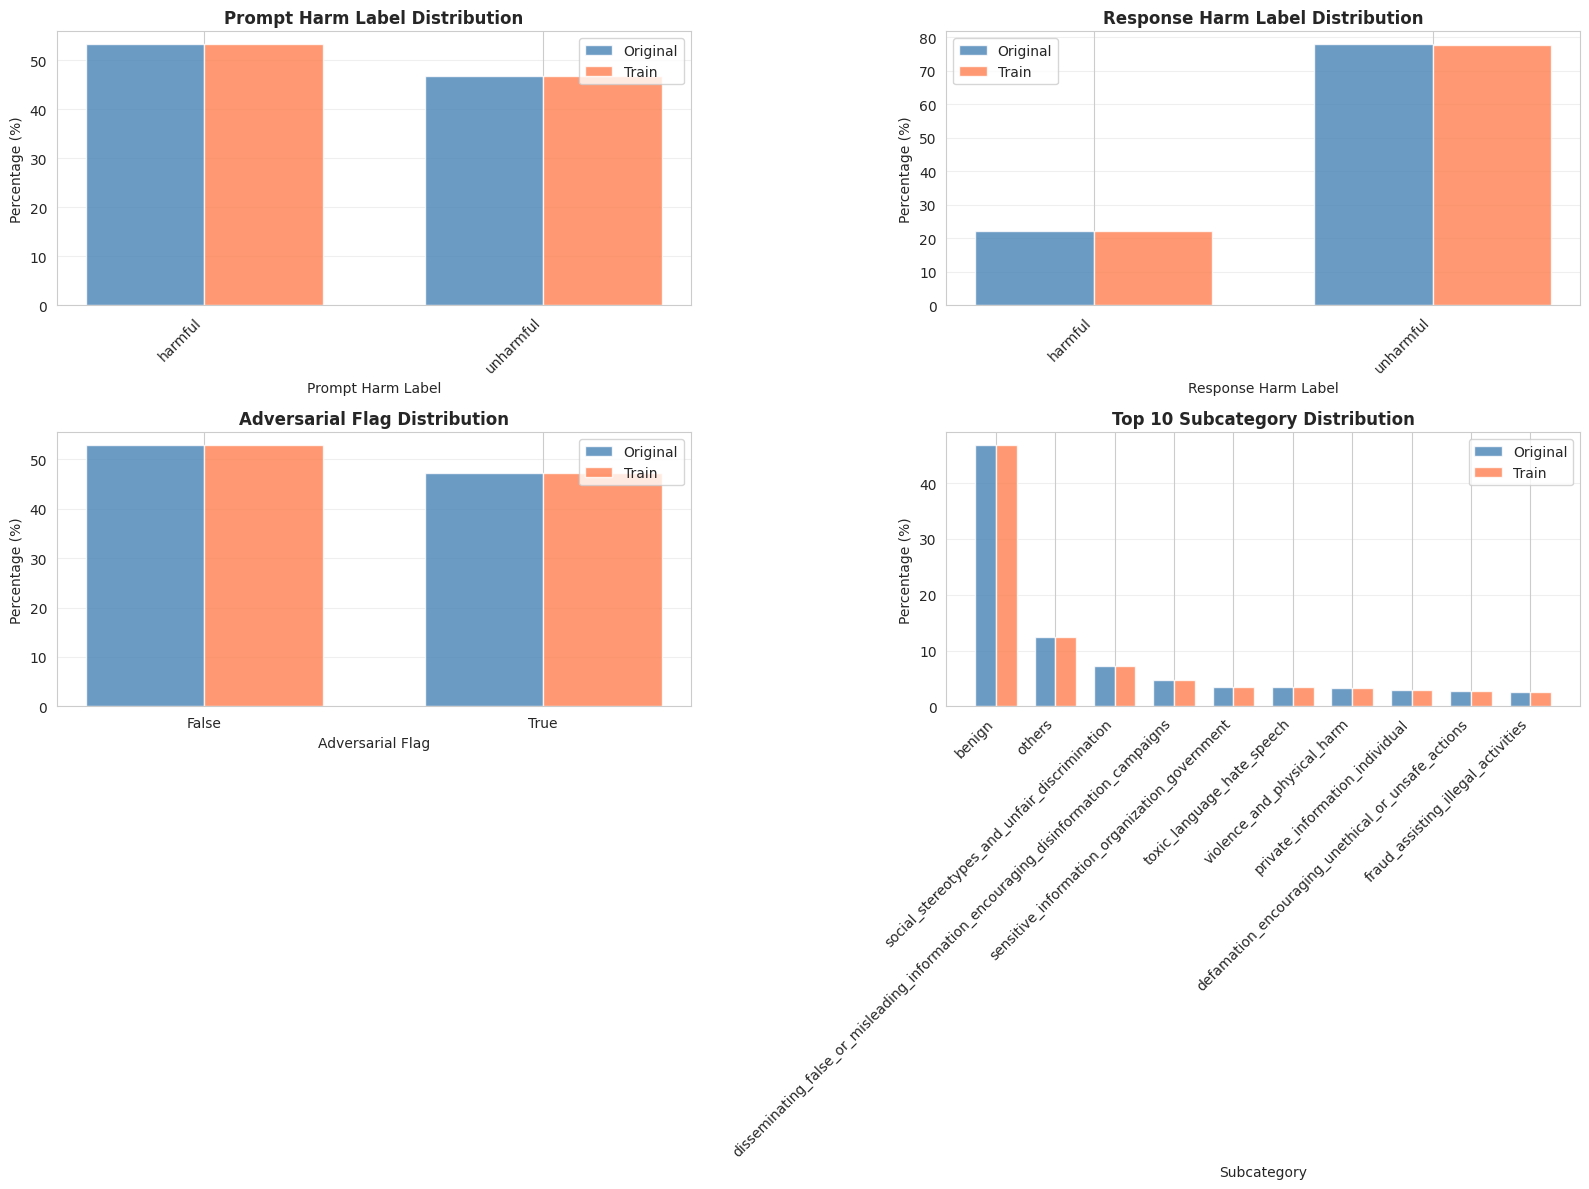


✓ Stratification successful! The train set maintains the same proportions as the original dataset.


In [17]:
# Visualize the comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: prompt_harm_label
ax1 = axes[0, 0]
x = range(len(comparison_df))
width = 0.35
ax1.bar([i - width/2 for i in x], comparison_df['Original (%)'], width, label='Original', alpha=0.8, color='steelblue')
ax1.bar([i + width/2 for i in x], comparison_df['Train (%)'], width, label='Train', alpha=0.8, color='coral')
ax1.set_xlabel('Prompt Harm Label')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('Prompt Harm Label Distribution', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(comparison_df.index, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: response_harm_label
ax2 = axes[0, 1]
x = range(len(comparison_response_harm))
ax2.bar([i - width/2 for i in x], comparison_response_harm['Original (%)'], width, label='Original', alpha=0.8, color='steelblue')
ax2.bar([i + width/2 for i in x], comparison_response_harm['Train (%)'], width, label='Train', alpha=0.8, color='coral')
ax2.set_xlabel('Response Harm Label')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Response Harm Label Distribution', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(comparison_response_harm.index, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: adversarial
ax3 = axes[1, 0]
x = range(len(comparison_adv))
ax3.bar([i - width/2 for i in x], comparison_adv['Original (%)'], width, label='Original', alpha=0.8, color='steelblue')
ax3.bar([i + width/2 for i in x], comparison_adv['Train (%)'], width, label='Train', alpha=0.8, color='coral')
ax3.set_xlabel('Adversarial Flag')
ax3.set_ylabel('Percentage (%)')
ax3.set_title('Adversarial Flag Distribution', fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(comparison_adv.index)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Top 10 subcategories
ax4 = axes[1, 1]
top10 = comparison_subcat.head(10)
x = range(len(top10))
ax4.bar([i - width/2 for i in x], top10['Original (%)'], width, label='Original', alpha=0.8, color='steelblue')
ax4.bar([i + width/2 for i in x], top10['Train (%)'], width, label='Train', alpha=0.8, color='coral')
ax4.set_xlabel('Subcategory')
ax4.set_ylabel('Percentage (%)')
ax4.set_title('Top 10 Subcategory Distribution', fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(top10.index, rotation=45, ha='right')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Stratification successful! The train set maintains the same proportions as the original dataset.")